In [73]:
import pandas as pd
import numpy as np
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split

In [74]:
%cd
data = pd.read_csv('/home/sravanchittupalli/konnoha/clones/Lets_HackIT/dataset/crops_final_updated.csv')

/home/sravanchittupalli


In [75]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Area,Production,Temperature,PH,Rainfall,Sowing Temp,Harvest Temp,Nitrogen,Phosphorous,Potash,crop
0,Andhra Pradesh,ANANTAPUR,1997,Kharif,21400.0,2600.0,33.259371,7.030931,60.840858,32.784967,37.270328,6.714771,17.600410,12.486837,arhar/tur
1,Andhra Pradesh,CHITTOOR,1997,Kharif,6100.0,900.0,33.324233,6.562556,64.758946,29.302448,36.956692,5.567610,16.455509,11.969066,arhar/tur
2,Andhra Pradesh,EAST GODAVARI,1997,Kharif,1600.0,300.0,33.736284,6.557421,61.573425,29.146480,36.275074,5.756515,17.515505,12.502116,arhar/tur
3,Andhra Pradesh,GUNTUR,1997,Kharif,28400.0,14900.0,32.341533,6.821730,63.761790,25.673411,38.106889,4.178075,17.142154,10.121922,arhar/tur
4,Andhra Pradesh,KADAPA,1997,Kharif,5700.0,1400.0,32.777780,7.151006,61.350980,29.779704,38.117548,6.557079,17.702045,11.426577,arhar/tur


In [76]:

reqd = data.iloc[:, 4:6]
reqd

concat_data = pd.concat([data, reqd], axis=1)

reqd = concat_data.iloc[:, 14:]
reqd
reqd = reqd.dropna()
print(reqd['Production'].isnull().sum())

0


In [94]:
crops = ["arhar/tur",
"bajra",
"barley",
"coriander",
"cotton_lint",
"cowpea_lobia",
"dry chillies",
"garlic",
"ginger",
"gram",
"groundnut",
"jowar",
"linseed",
"maize-k",
"maize-r",
"masoor",
"moong_green_gram",
"onion",
"peas_and_beans_pulses",
"potato",
"ragi",
"rapeseed &mustard",
"rice",
"safflower",
"sugarcane",
"sunflower",
"turmeric",
"urad",
"wheat"]

print(len(crops))

crop_data=[]
for crop in crops:
    data = reqd[reqd['crop'].str.contains(crop)]
    crop_data.append(data)

print(crop_data[0])

29
             crop     Area  Production
0       arhar/tur  21400.0      2600.0
1       arhar/tur   6100.0       900.0
2       arhar/tur   1600.0       300.0
3       arhar/tur  28400.0     14900.0
4       arhar/tur   5700.0      1400.0
...           ...      ...         ...
116780  arhar/tur      1.0         1.0
116781  arhar/tur     71.0        60.0
116782  arhar/tur   1620.0      1733.0
116783  arhar/tur      1.0         1.0
116784  arhar/tur    379.0       279.0

[6701 rows x 3 columns]


In [ ]:
ar_prod = tur_data.iloc[:, 1:3].values
ar_prod
less=0
greater = 0
for i in ar_prod:
    if (i[0]/i[1]) > 1:
        greater+=1
    else:
        less+=1

print(less, greater)

[2.14e+04 6.10e+03 1.60e+03 ... 1.62e+03 1.00e+00 3.79e+02] [2.600e+03 9.000e+02 3.000e+02 ... 1.733e+03 1.000e+00 2.790e+02]


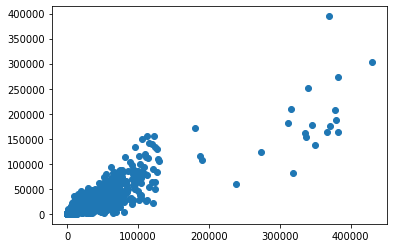

In [140]:
inputs=[]
outputs=[]
for i in range(0, 29, 1):
    in_p = crop_data[i].iloc[:, 1].values
    inputs.append(in_p)
    out_p = crop_data[i].iloc[:, 2].values
    outputs.append(out_p)
    
print(inputs[0], outputs[0])

import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(inputs[crops.index('arhar/tur')], outputs[crops.index('arhar/tur')])
plt.show()

In [108]:
all_crops_data=[]
for i in range(0, 29, 1):
    X_train, X_test, Y_train, Y_test = train_test_split(inputs[i], outputs[i], random_state=7, shuffle=True)
    all_crops_data.append((X_train, X_test, Y_train, Y_test))
all_crops_data[0][1].reshape(-1,1)

array([[  120.],
       [ 1040.],
       [ 2600.],
       ...,
       [11933.],
       [22827.],
       [  735.]])

In [123]:
from sklearn.linear_model import LinearRegression

model_list=[]
for i in range (0, 29, 1):
    model = LinearRegression(fit_intercept=False, normalize=True)
    model_list.append(model)

In [124]:
pred_list=[]
for i in range (0, 29, 1):
    model_list[i].fit(all_crops_data[i][0].reshape(-1, 1), all_crops_data[i][2].reshape(-1,1))
    pred = model_list[i].predict(all_crops_data[i][1].reshape(-1,1))
    pred_list.append(pred)

In [125]:
print(pred_list[28])

[[152987.6663665 ]
 [132028.04193124]
 [ 38730.69689184]
 ...
 [ 66604.60990354]
 [ 74313.68040177]
 [659618.73218973]]


In [133]:
for i in range (0, 29, 1):
    print('Crop: {0}   score: {1}'.format(crops[i],model_list[i].score(all_crops_data[i][1].reshape(-1, 1), all_crops_data[i][3].reshape(-1,1))))

Crop: arhar/tur   score: 0.8508370580305963
Crop: bajra   score: 0.4974533063679354
Crop: barley   score: 0.8508674984264062
Crop: coriander   score: 0.8584077383990767
Crop: cotton_lint   score: 0.6790480628433928
Crop: cowpea_lobia   score: 0.8568604865549992
Crop: dry chillies   score: 0.6402340069407711
Crop: garlic   score: 0.9798976699353794
Crop: ginger   score: 0.5162680386156244
Crop: gram   score: 0.7743514112893263
Crop: groundnut   score: 0.611774923902477
Crop: jowar   score: 0.8126181918588248
Crop: linseed   score: 0.7676731876670799
Crop: maize-k   score: 0.7741621218043957
Crop: maize-r   score: 0.8025743197757262
Crop: masoor   score: 0.8416675867022526
Crop: moong_green_gram   score: 0.6874364707160029
Crop: onion   score: 0.1735614687717476
Crop: peas_and_beans_pulses   score: 0.821079197670863
Crop: potato   score: 0.8778725427585121
Crop: ragi   score: 0.8884509232951636
Crop: rapeseed &mustard   score: 0.9144020069562969
Crop: rice   score: 0.7268441847346372
Cro

In [127]:
model_list[crops.index('masoor')].predict([[2745]])

array([[1760.99283105]])

In [142]:
#rates of crops per quintal
crops_rates = {"arhar/tur":6000,
"bajra":2150,
"barley":1600,
"coriander":0,
"cotton_lint":5515,
"cowpea_lobia":0,
"dry chillies":0,
"garlic":0,
"ginger":0,
"gram":4875,
"groundnut":5275,
"jowar":2640,
"linseed":0,
"maize-k":1850,
"maize-r":0,
"masoor":4800,
"moong_green_gram":7196,
"onion":500,
"peas_and_beans_pulses":0,
"potato":400,
"ragi":3295,
"rapeseed &mustard":4425,
"rice":1868,
"safflower":5215,
"sugarcane":285,
"sunflower":5885,
"turmeric":6500,
"urad":6000,
"wheat":1925}

In [ ]:
price = 